## 🛑 Complete los siguientes datos

- Nombre y Apellidos: Asier Burgos, Ander Perez y Katrin Muñoz
- Entrega: Práctica 02 - Algoritmo Genetico.ipynb
- Fecha: 29/09/2025
- Tiempo dedicado a la entrega: 6 horas divididas en 3 dias distintos, teniendo en cuenta el tiempo dedicado en clase.
- Principales dudas y dificultades encontrados en el desarrollo:
Entender la relacion entre el ejercicio que se nos ha planteado y el ejemplo propuesto.
Colaborar en grupo con la herramienta Google Colab sin ir perdiendo informacion o codigo por el camino.
Tambien hemos invertido bastante timepo en como desarrollar el algoritmo para Fitness Cesta del apartado 2.
Poner de forma bonita los graficos obtenidos en los diferentes experimentos del apartado 4.

#Instrucciones Generales

**Laboratorio de IA**

# **Contexto de la práctica, preliminares e instrucciones**

Este es el cuaderno que utilizarás como **plantilla** para entrega de la asignatura Laboratorio de IA del tema correpondiente.

La práctica está **alineada** con las sesiones de teoría y el ejemplo de código visto en el aula, por lo que es recomendable un repaso al material del tema previo a la implementación de la práctica.

Por favor, **lee atentamente** el enunciado. Si tienes alguna duda, utiliza el foro o ponte en contacto con el profesor (pero no compartas código).

Consideraciones generales sobre la **limpieza y eficiencia del código**:
- Cuando se le pida que presente un valor o resultado, muéstrelo con el contexto y la precisión adecuados, es decir, "La tabla tiene 100 filas y 4 columnas" en lugar de mostrar "100 4" por pantalla o "precisión del 66,7%" en lugar de simplemente imprimir "0,66666666".
- Utilice tantas celdas (de texto o de código) como considere para dar una respuesta legible y clara a las preguntas planteadas.
- Mostrar resultados intermedios o finales (tablas, contenido de las variables...) que demuestren que la solución es correcta si fuera necesario.
- No olvide importar todas las librerías necesarias para la correcta ejecución del código, incluyendo la instalación de las mismas, si fuera necesario.


**Para entregar el cuaderno:**
- Imprímelo en un archivo PDF con todas las secciones expandidas y todas las celdas ejecutadas, de forma que se pueda ver todo el código y se muestren todos los resultados.
- Guardar el cuaderno como archivo ipynb.

Envía ambos archivos en una carpeta zip a ALUD. Nombre los ficheros con su nombre, apellidos y el número de práctica.

**Evaluación**
La calificación de los ejercicios se hará con los siguientes criterios:
- [8 a 10] puntos: La solución aportada cumple con los requisitos de forma excelente y existen aspectos positivos o extras que avalan su excelencia, o se ha ido más allá del planteamiento dado.
- [6 a 8] puntos: La solución aportada cumple con los requisitos, pero algunas cuestiones menores son susceptibles de ser mejoradas, tales como: presentación de la solución, justificación de la decisión tomada, eficiencia del código...
- [5 a 6] puntos: Las soluciones aportadas no cumplen alguno de los requisitos, como por ejemplo: no se responde a una pregunta, no se aporta la solución a una parte...
- [1 a 5] puntos: La solución aportada no cumple con varios requisitos.
- [0] puntos: solución no aportada o solución plagiada.

**La limpieza y la eficiencia del código, así como las explicaciones dadas serán tenidas en cuenta  para la evaluación.**

**Plazo:** El plazo de entrega de la práctica son dos semanas tras la presentación de la misma en el aula.

Tenga presente que la práctica puede entregarse pasado el plazo dado, en cualquier momento del cuatrimestre, teniendo en cuenta que, la entrega pasado el plazo será evaluada sobre el 75% de la calificación.


# 🛑 Desarrollo a realizar

# Práctica: Algoritmo genético para la selección de una cesta de productos diversa

## Objetivo

Diseñar e implementar en Python un **algoritmo genético** que seleccione una cesta de **X productos** (parámetro por fijar) para recomendar a nuevos clientes. La selección debe **maximizar el margen esperado** de la cesta y, al mismo tiempo, respetar una **restricción de diversidad**: no se pueden incluir dos productos de la misma familia.

---

## 1) Preparación de datos

1. Cargar y limpiar el dataset `retail.csv` (eliminar cantidades negativas, precios nulos o facturas de devolución).
2. Agrupar por producto (`StockCode`):

   * **Precio medio**: media de `UnitPrice`.
   * **Margen unitario estimado**: `UnitPrice × 0.30`.
   * **Número de clientes distintos** que lo han comprado.
   * **Probabilidad de compra en el próximo mes**:

     * Definir el último mes del dataset.
     * Calcular:
        * ProbCompra_p = (#clientes que compraron el producto en el último mes) / (#clientes totales que lo compraron)
       
3. Calcular el **valor esperado por producto** = `ProbCompra × Margen unitario`.
4. Inferir la **familia de producto**: asumiremos que viene definida por los dos primeros carácteres del StockCode.

---

## 2) Problema a resolver

* **Decisión:** elegir exactamente X productos distintos.
* **Función objetivo (fitness):**

  $$
  Fitness(Cesta) = \sum_{p \in cesta} (ProbCompra_p \times Margen_p)
  $$
* **Restricción de diversidad:** no más de un producto de la misma familia.

  * Si un cromosoma incluye dos productos de la misma familia → penalización fuerte (fitness reducido).

---

## 3) Codificación y operadores genéticos

* **Codificación:** vector binario de longitud N (N = número total de productos), con exactamente X unos.
* **Población inicial:** generar individuos válidos aleatorios (con X unos sin violar diversidad).
* **Operadores:**

  * **Selección por ruleta** proporcional al fitness.
  * **Cruce uniforme:** para cada posición, heredar gen del padre o de la madre con probabilidad 0.5. Si el hijo no cumple la restricción de “X unos”, ajustar aleatoriamente. El operador se ejecutará con probabilidad *pcross*.
  * **Mutación:** cambiar un 1 por un 0 y un 0 por un 1, manteniendo siempre X productos. Se ejecutará con probabilidad *pmut*.
* **Elitismo:** los 2 mejores individuos pasan directamente a la siguiente generación.
* **Penalización:** si un cromosoma rompe la restricción de diversidad, se multiplica su fitness por 0.1.
* **Monitorización**: En cada generación, se debe mostrar el valor de la función objetivo del mejor individuo, así como los códigos de los X productos seleccionados.


---

## 4) Ejecución y experimentos

Ejecuta el algoritmo en al menos **3 configuraciones diferentes**. En todos los casos, con valores similares de número de individuos, generaciones y probabilidades de los operadores:

1. Para cesta de 5 Productos
1. Para cesta de 10 Productos
1. Para cesta de 25 Productos

En cada caso, muestra:

* El mejor fitness final.
* La cesta recomendada (productos, precio medio, margen total esperado, familias incluidas).
* Gráfico de evolución del fitness por generación.

---

## 5) Entregables

* **Notebook (.ipynb)** con código, comentarios y resultados. Incluyendo:
  * **Tabla final** con la cesta óptima encontrada en cada configuración.
  * **Gráficas de evolución** de fitness.
  * **Informe breve y comentarios** integrados en el propio cuaderno.

---

## Evaluación

* **Funcionalidad (50 %):** el código implementa el GA completo y cumple con las restricciones.
* **Claridad y presentación (50 %):** notebook bien estructurado, comentarios, análisis de resultados y gráficas.


Importar librerías

In [ ]:
from numpy.random import randint
from numpy.random import rand
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **PARTE 1 — Preparación de datos**

En esta primera parte cargamos el retail.csv y hacemos una limpieza mínima para evitar sesgos: nos quedamos con transacciones válidas (cantidades y precios positivos) y agrupamos por StockCode para calcular, por producto, las métricas que usaremos más adelante. En concreto:

Precio medio: la media de UnitPrice, que nos da una referencia de cuánto se vende cada producto.

Margen unitario estimado: como no tenemos el coste real, aproximamos el margen como el 30% del precio medio. Es una simplificación, pero suficiente para el objetivo de la práctica.

Clientes únicos: contamos cuántos clientes distintos han comprado cada producto, de forma que las métricas no se distorsionen por compras repetidas del mismo cliente.

Probabilidad de compra “en el próximo mes”: tomamos el último mes presente en el dataset y medimos qué proporción de los clientes de ese producto lo compraron durante ese mes. Formalmente:

$$
\text{ProbCompra}_{p} =
\frac{\text{clientes que compraron } p \text{ en el último mes}}
     {\text{clientes que han comprado } p}
 $$

Valor esperado por producto: combinamos la probabilidad anterior con el margen (valor esperado = prob × margen). Así priorizamos productos rentables y con recencia en la demanda.

Familia de producto: inferimos una familia a partir de los dos primeros caracteres de StockCode. Esta familia nos servirá para imponer diversidad en la cesta (no queremos recomendar dos artículos “muy iguales”).

Con todo esto obtenemos una tabla clientes donde cada fila es un producto con sus métricas clave para el algoritmo genético.

In [ ]:
datos_retail = pd.read_csv("retail.csv", parse_dates=["InvoiceDate"])

# Filtrar transacciones validas (cantidad y precio positivos, evitar devoluciones, eliminar casos anomalos)
datos_retail = datos_retail[(datos_retail["Quantity"] > 0) & (datos_retail["UnitPrice"] > 0)]

In [ ]:
# Agrupar por producto (StockCode): Precio medio y numero de clientes distintos + margen unitario estimado
clientes = datos_retail.groupby("StockCode").agg(
    precio_medio=("UnitPrice", "mean"),
    num_clientes=("CustomerID", "nunique"),
).reset_index()
clientes["margen_unitario"] = clientes["precio_medio"] * 0.30

# Definir ultimo mes del dataset
ultimos = datos_retail["InvoiceDate"].max()
inicio = pd.Timestamp(ultimos.year, ultimos.month, 1)
fin = inicio + pd.offsets.MonthEnd(1)

# Clientes unicos por producto en ultimo mes
clientes_ult_mes = (
    datos_retail[(datos_retail["InvoiceDate"] >= inicio) & (datos_retail["InvoiceDate"] <= fin)]
    .groupby("StockCode")["CustomerID"].nunique()
    .rename("num_clientes_ult_mes")
    .reset_index()
)

# Calcular probabilidad de compra
clientes = clientes.merge(clientes_ult_mes, on="StockCode", how="left").fillna({"num_clientes_ult_mes": 0})
clientes["prob_compra_ultimo_mes"] = clientes["num_clientes_ult_mes"] / clientes["num_clientes"]

# Enseñar pruebas
print(clientes)

         StockCode  precio_medio  num_clientes  margen_unitario  \
0            10002      1.086620            59         0.325986   
1            10080      0.425385            13         0.127615   
2            10120      0.210000            19         0.063000   
3           10123C      0.650000             3         0.195000   
4           10124A      0.420000             4         0.126000   
...            ...           ...           ...              ...   
3779  gift_0001_20     16.713750             8         5.014125   
3780  gift_0001_30     25.075714             7         7.522714   
3781  gift_0001_40     33.566667             3        10.070000   
3782  gift_0001_50     41.890000             4        12.567000   
3783             m      2.550000             1         0.765000   

      num_clientes_ult_mes  prob_compra_ultimo_mes  
0                      0.0                0.000000  
1                      0.0                0.000000  
2                      1.0          

In [ ]:
# Valor esperado por producto = probabilidad compra × margen unitario
clientes["valor_esperado"] = (clientes["prob_compra_ultimo_mes"] * clientes["margen_unitario"]).round(4)

# Mostrar resultado de los 10 con mayor valor esperado
print(
    clientes[["StockCode","margen_unitario","prob_compra_ultimo_mes","valor_esperado"]]
      .sort_values("valor_esperado", ascending=False)
      .head(10)
)

     StockCode  margen_unitario  prob_compra_ultimo_mes  valor_esperado
2273     23472         6.186600                1.000000          6.1866
2924     84616        12.628714                0.285714          3.6082
2272     23471         3.442000                0.833333          2.8683
3774         M        70.989515                0.040230          2.8559
2319     23541         2.701167                1.000000          2.7012
2320     23542         2.688333                1.000000          2.6883
2321     23543         2.679833                1.000000          2.6798
3126    84968d         7.488000                0.333333          2.4960
2267     23465         2.475000                1.000000          2.4750
2269     23468         2.475000                1.000000          2.4750


In [ ]:
# Inferir familia de producto = primeros 2 caracteres del StockCode
clientes["familia_producto"] = clientes["StockCode"].astype(str).str[:2]

# Resultado de la inferencia
print(clientes[["StockCode", "familia_producto"]])

         StockCode familia_producto
0            10002               10
1            10080               10
2            10120               10
3           10123C               10
4           10124A               10
...            ...              ...
3779  gift_0001_20               gi
3780  gift_0001_30               gi
3781  gift_0001_40               gi
3782  gift_0001_50               gi
3783             m                m

[3784 rows x 2 columns]


# **PARTE 2 — Formulación del problema y función objetivo**

Aquí traducimos el problema de recomendación a una formulación que un algoritmo genético (GA) sabe optimizar:

Decisión: representamos una cesta como un vector binario de longitud
𝑁 (número total de productos). Un 1 significa “producto elegido” y un 0 significa “producto no elegido”. Imponemos exactamente
𝑋 unos (tamaño fijo de la cesta).

Función objetivo (fitness): queremos maximizar la suma del valor esperado de los productos escogidos:

$$
\text{Fitness}(\text{cesta}) = \sum_{p \in \text{cesta}} \left( \text{ProbCompra}_p \times \text{Margen}_p \right)$$

De este modo, la cesta final favorece artículos con buen margen y probabilidad reciente de compra.

Restricción de diversidad: para evitar una cesta redundante, no permitimos más de un producto por familia. Si un cromosoma rompe esta regla, aplicamos una penalización fuerte al fitness (multiplicamos por 0.1). Así, durante la evolución, las soluciones diversas resultan claramente preferibles.

En resumen, la variable de decisión controla qué productos entran en la cesta, la función objetivo prioriza margen esperado, y la diversidad se garantiza mediante una penalización que desalienta duplicidades de familia.

In [ ]:
X = 5  # Elegir X productos distintos
N = len(clientes) # Numero total de productos distintos

valor_esp = clientes["valor_esperado"].to_numpy() # Me guardo el valor esperado
familias = clientes["familia_producto"].astype(str).to_numpy() # Me guardo la familia de cada producto

# Crear un cromosoma aleatorio valido con X productos y sin repetir familia
crom = np.zeros(N, dtype=int) #Inicializar el cromosoma. Cada posicion indica si el producto se ha elegido para el cromosoma o no
while True:
  crom[:] = 0
  sel = [] # Indices de productos seleccionados
  seen = set() # Familias ya usadas en el cromosoma
  # Recorrer los productos en orden aleatorio
  for i in np.random.permutation(N):
    # Solo seleccionamos el producto si su familia aun no ha sido elegida
    if familias[i] not in seen:
      sel.append(i); seen.add(familias[i])
      if len(sel) == X:
        break
  # Si el cromosoma tiene exactamente X productos se acepta
  if len(sel) == X:
    crom[sel] = 1
    break

# fitness con penalizacion (fitness reducido) --> si no hay X unos o hay familias repetidas penaliza
idxs = np.flatnonzero(crom) # Mirar que indices se han seleccionado
penalizar = (idxs.size != X) or (np.unique(familias[idxs]).size != idxs.size)
fitness = valor_esp[idxs].sum() * (0.1 if penalizar else 1.0)

# Mostrar resultados del cromosoma y del fitness
print("Genes activos:", idxs)
print("Fitness:", round(fitness, 4))

Genes activos: [1362 2011 2788 3533 3764]
Fitness: 0.0488


# **PARTE 3 — Algoritmo genético: codificación y operadores**

En esta parte implementamos el algoritmo genético (GA) que va a construir la cesta de productos. La idea es representar cada solución como un vector binario de longitud
𝑁 (número total de productos), donde el valor 1 en la posición 𝑝 significa “incluimos el producto 𝑝 en la cesta” y 0 significa que no. Forzamos que haya exactamente 𝑋 unos para fijar el tamaño de la cesta.

El fitness de un individuo es la suma del valor esperado de los productos que contiene. Recordemos que el valor esperado de un producto 𝑝 es:


$$
\text{ValorEsperado}_p = \text{ProbCompra}_p \times \text{Margen}_p
$$

Así, las cestas con artículos que combinan alto margen y probabilidad reciente de compra obtendrán un fitness mayor.

Para preservar la diversidad, introducimos una penalización: si un individuo incluye dos productos de la misma familia, reducimos su fitness multiplicándolo por 0.1. Con esto, el GA “aprende” que no merece la pena acumular artículos equivalentes.

La población inicial se genera con individuos válidos: seleccionamos
𝑋 productos sin repetir familia. Desde el minuto cero, por tanto, el algoritmo explora soluciones que respetan la restricción.

Los operadores son los clásicos del GA:

* Selección por ruleta: asigna a cada individuo una probabilidad de ser padre proporcional a su fitness. En promedio, las mejores soluciones se reproducen más, empujando a la población hacia regiones prometedoras.

* Cruce uniforme: para cada gen (producto), heredamos del padre o de la madre con probabilidad 0.5. Después reparamos el número de unos para mantener exactamente 𝑋. Esto favorece la recombinación de buenas subcestas sin romper la viabilidad.

* Mutación: intercambiamos un 1 → 0  y un 0 → 1 manteniendo 𝑋 activos. Esta “chispa” de aleatoriedad evita el estancamiento en óptimos locales y mejora la exploración.

* Elitismo: pasamos directamente a la siguiente generación los 2 mejores individuos. Con esto protegemos las mejores soluciones ya encontradas.

Por último, hacemos monitorización por generación: mostramos el mejor fitness y los códigos de producto de la cesta top. Esto nos permite comprobar que el algoritmo progresa (fitness creciente o estabilizado) y que la restricción de diversidad se está respetando en la práctica.

In [ ]:
# Datos base
X, pop_size, gens, pcross, pmut = 5, 80, 60, 0.9, 0.2
N = len(clientes)
valor_esp = clientes["valor_esperado"].to_numpy()
familias  = clientes["familia_producto"].astype(str).to_numpy()
codes     = clientes["StockCode"].astype(str).to_numpy()

# Poblacion inicial (valida: X unos y sin repetir familia)
P = np.zeros((pop_size, N), dtype=int) # filas = individuos y columnas = productos
for r in range(pop_size):
  while True: # Generar un individuo valido X veces
    sel, seen = [], set()
    for i in np.random.permutation(N):
      if familias[i] not in seen:
        sel.append(i); seen.add(familias[i])
        if len(sel) == X:
          break
    if len(sel) == X:
      P[r, sel] = 1
      break

# Para guardar historial del mejor fitness por generacion
best_hist = []

# Evolucion recorriendo todas las generaciones
for g in range(gens):
  # Evaluar fitness con penalizacion
  idxs = [np.flatnonzero(P[i]) for i in range(pop_size)]
  F_base = np.array([valor_esp[idc].sum() for idc in idxs]) # Fitness base = suma de valores esperados
  penal  = np.array([(idc.size != X) or (np.unique(familias[idc]).size != idc.size) for idc in idxs]) # Calcular penalizacion a aplicar al fitness
  F = F_base * np.where(penal, 0.1, 1.0) # Calcular el fitness con su penalizacion

  # Calcular los 2 mejores individuos por generacion y enseñarlos
  elite = F.argsort()[::-1][:2]; best_hist.append(F[elite[0]])
  print(f"Gen {g+1:02d} | Best={F[elite[0]]:.4f} | Productos={list(codes[np.flatnonzero(P[elite[0]])])}")

  # Seleccion aleatoria para reproducirse
  probs = np.full(pop_size, 1/pop_size) if F.sum() <= 0 else F / F.sum()
  padres = P[np.random.choice(pop_size, size=pop_size, replace=True, p=probs)]

  # Cruce uniforme (heredar gen del padre o de la madre) + reparación de X unos
  hijos = np.empty_like(P)
  for i in range(0, pop_size, 2):
    p1, p2 = padres[i], padres[(i+1) % pop_size]
    if np.random.rand() < pcross:
      mask = np.random.rand(N) < 0.5
      h1 = np.where(mask, p1, p2).astype(int)
      h2 = np.where(mask, p2, p1).astype(int)
      for h in (h1, h2):  # reparar X unos
        k = h.sum()
        if k > X:
          ones = np.flatnonzero(h); h[np.random.choice(ones, k - X, replace=False)] = 0
        elif k < X:
          zeros = np.flatnonzero(1 - h); h[np.random.choice(zeros, X - k, replace=False)] = 1
    else:
      h1, h2 = p1.copy(), p2.copy()
    hijos[i], hijos[(i+1) % pop_size] = h1, h2

  # Mutacion que ocurrira con probabilidad pmut cambiando unos por ceros y viceversa
  for i in range(pop_size):
    if np.random.rand() < pmut:
      ones = np.flatnonzero(hijos[i]); zeros = np.flatnonzero(1 - hijos[i])
      if ones.size and zeros.size:
        hijos[i, np.random.choice(ones)] = 0
        hijos[i, np.random.choice(zeros)] = 1

  # Elitismo -- Los dos mejores individuos guardados antes pasan intactos sin mutacion ni nada
  hijos[elite] = P[elite]
  P = hijos

# Mejor solucion final
idxs = [np.flatnonzero(P[i]) for i in range(pop_size)]
F_base = np.array([valor_esp[idc].sum() for idc in idxs])
penal  = np.array([(idc.size != X) or (np.unique(familias[idc]).size != idc.size) for idc in idxs])
F = F_base * np.where(penal, 0.1, 1.0)

best = P[F.argmax()] # Mejor individuo
ib = np.flatnonzero(best) # Indices de productos seleccionados

# Mostrar resultados
print("\n----- Mejor solución final -----")
print("Fitness:", round(F.max(), 4))
print("Productos:", list(codes[ib]))
print("Familias:", list(familias[ib]))

Gen 01 | Best=1.9437 | Productos=['22587', '23535', '47481', '82613c', '90034']
Gen 02 | Best=1.9437 | Productos=['22587', '23535', '47481', '82613c', '90034']
Gen 03 | Best=2.7365 | Productos=['21306', '22587', '23535', '47481', '90176D']
Gen 04 | Best=2.7365 | Productos=['21306', '22587', '23535', '47481', '90176D']
Gen 05 | Best=4.7659 | Productos=['23535', '35095A', '82613c', '90034', 'M']
Gen 06 | Best=4.7659 | Productos=['23535', '35095A', '82613c', '90034', 'M']
Gen 07 | Best=4.7854 | Productos=['23535', '35095A', '47481', '82613c', 'M']
Gen 08 | Best=4.8294 | Productos=['22273', '23535', '82613c', '90034', 'M']
Gen 09 | Best=4.8294 | Productos=['22273', '23535', '84673B', '90034', 'M']
Gen 10 | Best=4.9008 | Productos=['22283', '23535', '82613c', '90034', 'M']
Gen 11 | Best=4.9008 | Productos=['22283', '23535', '82613c', '90000B', 'M']
Gen 12 | Best=4.9208 | Productos=['16202A', '23535', '82613c', '90099', 'M']
Gen 13 | Best=4.9320 | Productos=['21666', '23535', '82613c', '9009

# **PARTE 4 — Ejecución, experimentos y lectura de resultados**

En esta fase ejecutamos el GA en tres configuraciones de tamaño de cesta:
𝑋 = 5, 𝑋 = 10 y 𝑋 = 25. Mantenemos constantes el tamaño de población, el número de generaciones y las probabilidades de cruce y mutación para poder comparar el comportamiento del algoritmo bajo distintas presiones de selección (cestas más pequeñas vs. más grandes).

Para cada 𝑋, registramos:

1. Mejor fitness final: es la suma del valor esperado de los productos elegidos en la mejor solución hallada. Un valor mayor implica una cesta con mejor equilibrio entre rentabilidad y probabilidad de compra.

2. Cesta recomendada: listamos los códigos de producto e incluimos métricas clave (precio medio, margen, prob. de compra, valor esperado). También mostramos las familias para verificar rápidamente la diversidad (no debería haber repetidas).

3. Gráfico de evolución del fitness: esta curva muestra el mejor fitness por generación. Lo normal es observar un ascenso rápido al principio (el GA descubre buenas combinaciones) y luego una meseta cuando la población converge. Si la curva es plana desde el inicio, conviene revisar hiperparámetros (más generaciones, mayor población, o ajustar 𝑝cross/𝑝mut).

Cómo interpretar los resultados:

Si al aumentar 𝑋 crece el fitness final, es esperable: más productos implican más términos sumando al objetivo. Lo importante es que la cesta siga diversa (familias distintas) y que no se rellene con artículos de bajo valor esperado.

El listado de familias incluidas es un chequeo rápido de restricción: deben aparecer familias distintas; si en alguna generación ves una ruptura puntual, recuerda que el fitness penalizado desincentiva esas soluciones.

Si las curvas presentan oscilaciones acusadas, puede haber demasiada mutación; si se estancan muy temprano, puede faltar exploración.

En definitiva, esta parte demuestra que el GA es capaz de construir cestas óptimas (según nuestro criterio de valor esperado) manteniendo la diversidad por familias, y que el comportamiento es estable a lo largo de generaciones con una convergencia razonable.


================= EXPERIMENTO: X = 5 =================
Gen 01 | Best=1.4621 | Productos=['21385', '22826', '23092', '84732B', '85131D']
Gen 02 | Best=2.3299 | Productos=['22091', '23528', '37413', '84805A', '90176E']
Gen 03 | Best=2.4568 | Productos=['21116', '23528', '37413', '84270', '90176E']
Gen 04 | Best=3.5930 | Productos=['22826', '23528', '35400', '84805A', '90176E']
Gen 05 | Best=3.7008 | Productos=['22826', '23528', '37413', '84581', '90176E']
Gen 06 | Best=3.7539 | Productos=['21116', '22826', '23528', '37413', '90176E']
Gen 07 | Best=3.7539 | Productos=['21116', '22826', '23528', '37413', '90176E']
Gen 08 | Best=3.7539 | Productos=['21116', '22826', '23528', '37413', '90176E']
Gen 09 | Best=3.8553 | Productos=['21116', '22826', '23528', '84581', '90176E']
Gen 10 | Best=3.8553 | Productos=['21116', '22826', '23528', '84581', '90176E']
Gen 11 | Best=3.8553 | Productos=['21116', '22826', '23528', '84581', '90176E']
Gen 12 | Best=3.8553 | Productos=['21116', '22826', '23528', 

,StockCode,familia_producto,precio_medio,margen_unitario,prob_compra_ultimo_mes,valor_esperado
0,84968d,84,24.960000,7.488000,0.333333,2.4960
1,22826,22,121.060606,36.318182,0.035714,1.2971
2,90176E,90,7.500000,2.250000,0.500000,1.1250
3,72807B,72,5.345730,1.603719,0.028169,0.0452
4,21213,21,0.791837,0.237551,0.061798,0.0147


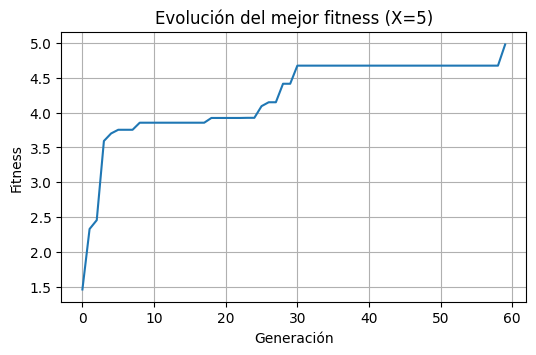


================= EXPERIMENTO: X = 10 =================
Gen 01 | Best=3.9290 | Productos=['20821', '21946', '22654', '23027', '35966', '37509', '71496B', '79191D', '84616', '90026D']
Gen 02 | Best=3.9290 | Productos=['20821', '21946', '22654', '23027', '35966', '37509', '71496B', '79191D', '84616', '90026D']
Gen 03 | Best=5.0090 | Productos=['16219', '21239', '22654', '23027', '35966', '71496B', '79191D', '84616', '90026D', 'POST']
Gen 04 | Best=5.0090 | Productos=['16219', '21239', '22654', '23027', '35966', '71496B', '79191D', '84616', '90026D', 'POST']
Gen 05 | Best=5.0090 | Productos=['16219', '21239', '22654', '23027', '35966', '71496B', '79191D', '84616', '90026D', 'POST']
Gen 06 | Best=5.0090 | Productos=['16219', '21239', '22654', '23027', '35966', '71496B', '79191D', '84616', '90026D', 'POST']
Gen 07 | Best=5.0090 | Productos=['16219', '21239', '22654', '23027', '35966', '71496B', '79191D', '84616', '90026D', 'POST']
Gen 08 | Best=5.0090 | Productos=['16219', '21239', '22654'

,StockCode,familia_producto,precio_medio,margen_unitario,prob_compra_ultimo_mes,valor_esperado
0,84616,84,42.095714,12.628714,0.285714,3.6082
1,23542,23,8.961111,2.688333,1.000000,2.6883
2,22826,22,121.060606,36.318182,0.035714,1.2971
3,POST,PO,34.070232,10.221070,0.104377,1.0668
4,21331,21,14.873333,4.462000,0.166667,0.7437
5,90051,90,7.044286,2.113286,0.285714,0.6038
6,78033,78,5.525000,1.657500,0.142857,0.2368
7,15056BL,15,6.375000,1.912500,0.065217,0.1247
8,71496B,71,0.570000,0.171000,0.666667,0.1140
9,16225,16,1.502453,0.450736,0.139535,0.0629


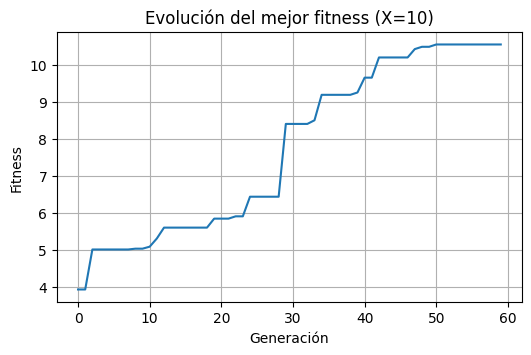


================= EXPERIMENTO: X = 25 =================
Gen 01 | Best=5.3445 | Productos=['16238', '17038', '20986', '21447', '22555', '23049', '35809A', '37491A', '40005B', '44092C', '46000M', '47591d', '48187', '62096A', '71477', '72800B', '75131', '79406', '84660B', '85125', '90076', 'BANK CHARGES', 'DCGS0070', 'DOT', 'M']
Gen 02 | Best=5.3445 | Productos=['16238', '17038', '20986', '21447', '22555', '23049', '35809A', '37491A', '40005B', '44092C', '46000M', '47591d', '48187', '62096A', '71477', '72800B', '75131', '79406', '84660B', '85125', '90076', 'BANK CHARGES', 'DCGS0070', 'DOT', 'M']
Gen 03 | Best=5.3445 | Productos=['16238', '17038', '20986', '21447', '22555', '23049', '35809A', '37491A', '40005B', '44092C', '46000M', '47591d', '48187', '62096A', '71477', '72800B', '75131', '79406', '84660B', '85125', '90076', 'BANK CHARGES', 'DCGS0070', 'DOT', 'M']
Gen 04 | Best=5.3445 | Productos=['16238', '17038', '20986', '21447', '22555', '23049', '35809A', '37491A', '40005B', '44092C',

,StockCode,familia_producto,precio_medio,margen_unitario,prob_compra_ultimo_mes,valor_esperado
0,M,M,236.631717,70.989515,0.040230,2.8559
1,DOT,DO,221.460885,66.438266,0.029801,1.9799
2,90025A,90,3.750000,1.125000,0.500000,0.5625
3,48187,48,8.459980,2.537994,0.055385,0.1406
4,82494l,82,8.320732,2.496220,0.031250,0.0780
5,46000M,46,1.550000,0.465000,0.111111,0.0517
6,72800B,72,2.675500,0.802650,0.062500,0.0502
7,22555,22,1.809011,0.542703,0.078431,0.0426
8,44092C,44,0.850000,0.255000,0.166667,0.0425
9,20986,20,1.561268,0.468380,0.084746,0.0397


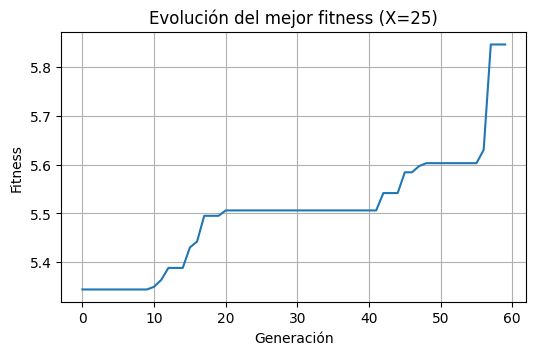

In [ ]:
# Datos base
pop_size, gens, pcross, pmut = 80, 60, 0.9, 0.2
valor_esp = clientes["valor_esperado"].to_numpy()
familias  = clientes["familia_producto"].astype(str).to_numpy()
codes     = clientes["StockCode"].astype(str).to_numpy()
N = len(clientes)

# Hacer el cromosoma con distintos valores de X
for X in [5, 10, 25]:
  print(f"\n================= EXPERIMENTO: X = {X} =================")
  # Poblacion inicial valida (X unos y sin repetir familia)
  P = np.zeros((pop_size, N), dtype=int)
  for r in range(pop_size):
    while True: # Hasta generar un individuo valido
      sel, seen = [], set()
      for i in np.random.permutation(N):
        if familias[i] not in seen:
          sel.append(i); seen.add(familias[i])
          if len(sel) == X:
            break
      if len(sel) == X:
        P[r, sel] = 1
        break
  # Lista para guardar el mejor fitness por generacion para que no sufran mutacciones
  best_hist = []

  # Evolucion recorriendo todas las generaciones
  for g in range(gens):
    # Evaluar fitness con penalizacion
    idxs  = [np.flatnonzero(P[i]) for i in range(pop_size)]
    Fbase = np.array([valor_esp[idc].sum() for idc in idxs]) # Fitness base = suma de valores esperados
    penal = np.array([(idc.size != X) or (np.unique(familias[idc]).size != idc.size) for idc in idxs]) # Calcular penalizacion a aplicar al fitness
    F = Fbase * np.where(penal, 0.1, 1.0) # Calcular el fitness con su penalizacion

    # Calcular los 2 mejores individuos por generacion y enseñarlos
    elite = F.argsort()[::-1][:2]; best_hist.append(F[elite[0]])
    print(f"Gen {g+1:02d} | Best={F[elite[0]]:.4f} | Productos={list(codes[np.flatnonzero(P[elite[0]])])}")

    # Seleccion aleatoria para reproducirse
    probs  = np.full(pop_size, 1/pop_size) if F.sum() <= 0 else F / F.sum()
    padres = P[np.random.choice(pop_size, size=pop_size, replace=True, p=probs)]

    # Cruce uniforme (heredar gen del padre o de la madre) y se repara para mantener X productos
    hijos = np.empty_like(P)
    for i in range(0, pop_size, 2):
      p1, p2 = padres[i], padres[(i+1) % pop_size]
      if np.random.rand() < pcross:
        mask = np.random.rand(N) < 0.5
        h1 = np.where(mask, p1, p2).astype(int)
        h2 = np.where(mask, p2, p1).astype(int)
        for h in (h1, h2):
          k = h.sum()
          if k > X:
            ones = np.flatnonzero(h); h[np.random.choice(ones, k-X, replace=False)] = 0
          elif k < X:
            zeros = np.flatnonzero(1-h); h[np.random.choice(zeros, X-k, replace=False)] = 1
      else:
        h1, h2 = p1.copy(), p2.copy()
      hijos[i], hijos[(i+1) % pop_size] = h1, h2

    # Mutacion que ocurrira con probabilidad pmut cambiando unos por ceros y viceversa
    for i in range(pop_size):
      if np.random.rand() < pmut:
        ones = np.flatnonzero(hijos[i]); zeros = np.flatnonzero(1 - hijos[i])
        if ones.size and zeros.size:
          hijos[i, np.random.choice(ones)] = 0
          hijos[i, np.random.choice(zeros)] = 1

    # Elitismo -- Los dos mejores individuos guardados antes pasan intactos sin mutacion ni nada
    hijos[elite] = P[elite]
    P = hijos

  # Mejor solucion final para cada X seleccionada
  idxs  = [np.flatnonzero(P[i]) for i in range(pop_size)]
  Fbase = np.array([valor_esp[idc].sum() for idc in idxs])
  penal = np.array([(idc.size != X) or (np.unique(familias[idc]).size != idc.size) for idc in idxs])
  F = Fbase * np.where(penal, 0.1, 1.0)

  best = P[F.argmax()] # Mejor individuo
  ib = np.flatnonzero(best) # Indices de productos seleccionados
  cesta = clientes.loc[ib, ["StockCode","familia_producto","precio_medio","margen_unitario","prob_compra_ultimo_mes","valor_esperado"]]\
                  .sort_values("valor_esperado", ascending=False)
  margen_total_esperado = cesta["valor_esperado"].sum() # Fitness final

  # Mostrar rersultados
  print("\n== Resumen X =", X, "==")
  print("Mejor fitness final:", round(F.max(), 4))
  print("Margen total esperado de la cesta:", round(margen_total_esperado, 4))
  print("Familias incluidas:", list(cesta["familia_producto"].unique()))
  display(cesta.reset_index(drop=True))

  # Graficar la evolucion del fitness
  plt.figure(figsize=(6,3.5))
  plt.plot(best_hist) # Solo el mejor fitness por generacion
    # Generar titulo y nombres de ejes
  plt.title(f"Evolución del mejor fitness (X={X})")
  plt.xlabel("Generación")
  plt.ylabel("Fitness")
  plt.grid(True)
  plt.show() # Enseñar grafico
